## ARIMA

In [1]:
# !pip install pmdarima
# !pip install mplfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from scipy import stats
from scipy.stats import zscore

from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

from itertools import product
from tqdm.notebook import tqdm

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import datetime 
from datetime import date, timedelta

start_date = datetime.datetime(2015, 1, 1)
end_date  = datetime.datetime(2023, 8, 23)

stock_name = "GOOGL"

my_stocks = yf.download(tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]
, start=start_date, end=end_date, group_by='tickers')
my_stocks.head()

[*********************100%%**********************]  13 of 13 completed


META                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2015-01-02  78.580002  78.930000  77.699997  78.449997  78.449997  18177500   
2015-01-05  77.980003  79.250000  76.860001  77.190002  77.190002  26452200   
2015-01-06  77.230003  77.589996  75.360001  76.150002  76.150002  27399300   
2015-01-07  76.760002  77.360001  75.820000  76.150002  76.150002  22045300   
2015-01-08  76.739998  78.230003  76.080002  78.180000  78.180000  23961000   

               AMZN                             ...     GME                    \
               Open     High      Low    Close  ...     Low   Close Adj Close   
Date                                            ...                             
2015-01-02  15.6290  15.7375  15.3480  15.4260  ...  8.3125  8.4500  6.288959   
2015-01-05  15.3505  15.4190  15.0425  15.1095  ...  8.3325  8.6800  6.460137   
2015-01-06  15.1120  15.1500  14.6190  14.7645  ...  8.3800  8.4225  6.268492   
2015-01-07  14.8750  15.0640  14.7665  14.9210  ...  8.2450  8.3250  6.195926   
2015-01-08  15.0160  15.1570  14.8055  15.0230  ...  8.3300  8.4225  6.268492   

                        NVDA                                              
              Volume    Open    High     Low   Close Adj Close    Volume  
Date                                                                      
2015-01-02   6450800  5.0325  5.0700  4.9525  5.0325  4.833629  11368000  
2015-01-05  19739600  5.0325  5.0475  4.9250  4.9475  4.751987  19795200  
2015-01-06  19540400  4.9550  4.9600  4.7925  4.7975  4.607914  19776400  
2015-01-07  10233200  4.8325  4.8750  4.7700  4.7850  4.595908  32180800  
2015-01-08  18189600  4.8400  4.9950  4.8375  4.9650  4.768796  28378000  

[5 rows x 78 columns]

In [4]:
df_adj =  my_stocks[stock_name][['Adj Close']].copy()
df_adj
df = my_stocks[stock_name]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000
...,...,...,...,...,...,...
2023-08-16,128.699997,130.279999,127.870003,128.699997,128.699997,25216100
2023-08-17,129.800003,131.990005,129.289993,129.919998,129.919998,33446300
2023-08-18,128.509995,129.250000,126.379997,127.459999,127.459999,30491300


In [5]:
# Plot Adjusted Close price

def df_adj_plot():
  sns.set(rc={'figure.figsize':(16, 8)})
  df_adj.plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

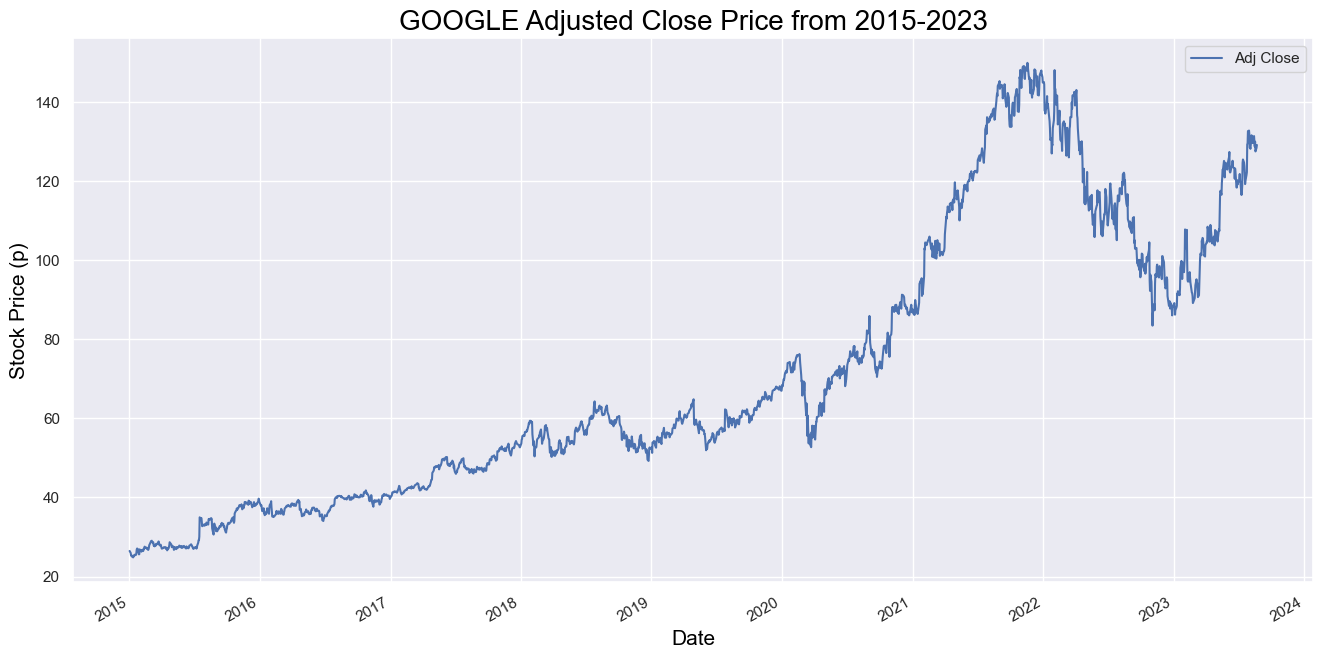

In [6]:
title_txt = "GOOGLE Adjusted Close Price from 2015-2023"
label_txt = "GOOGLE Adj Close"

df_adj_plot()

## Seasonality

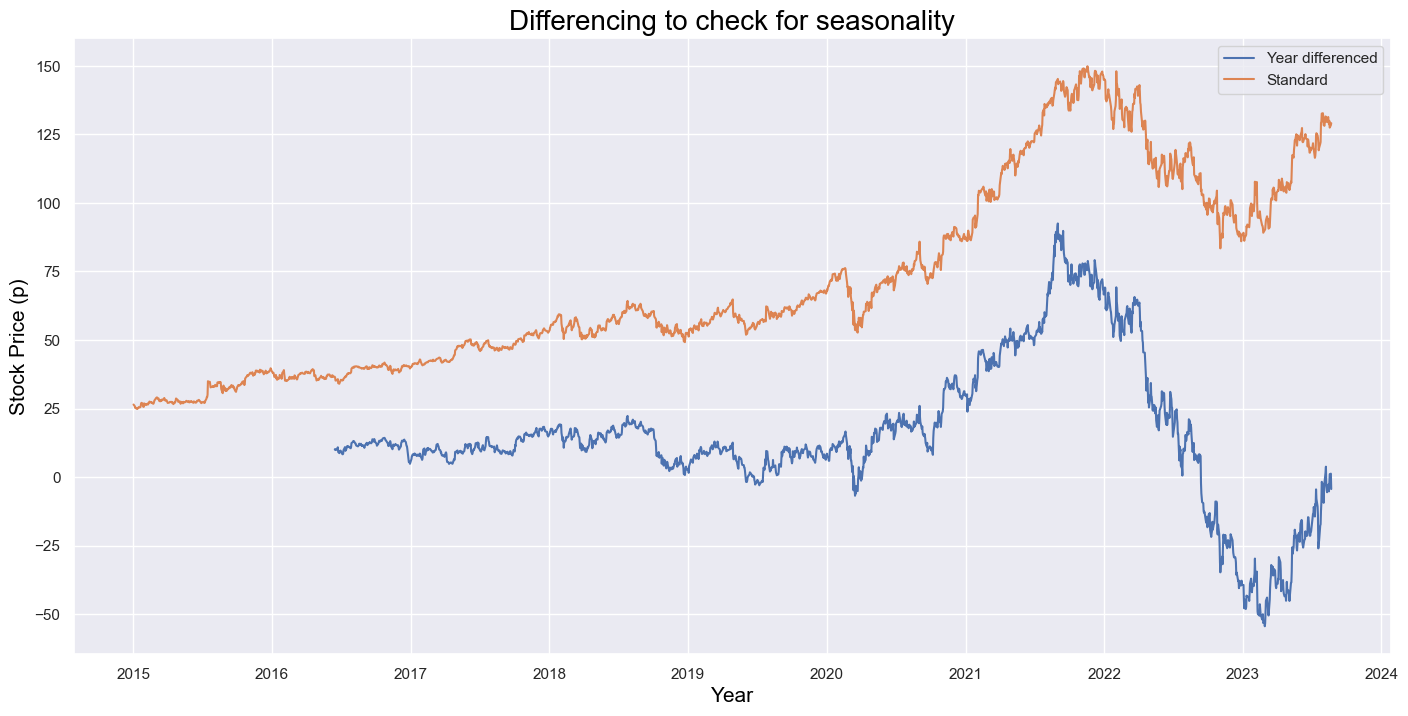

In [7]:
year_diff = df_adj.diff(periods=365)[365:]
plt.figure(figsize=(17, 8))
plt.plot(year_diff .index, year_diff , label='Year differenced')
plt.plot(df.index, df['Adj Close'], label='Standard')
plt.title("Differencing to check for seasonality", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15)
plt.grid(True)
plt.legend();

## AutoCorreleation

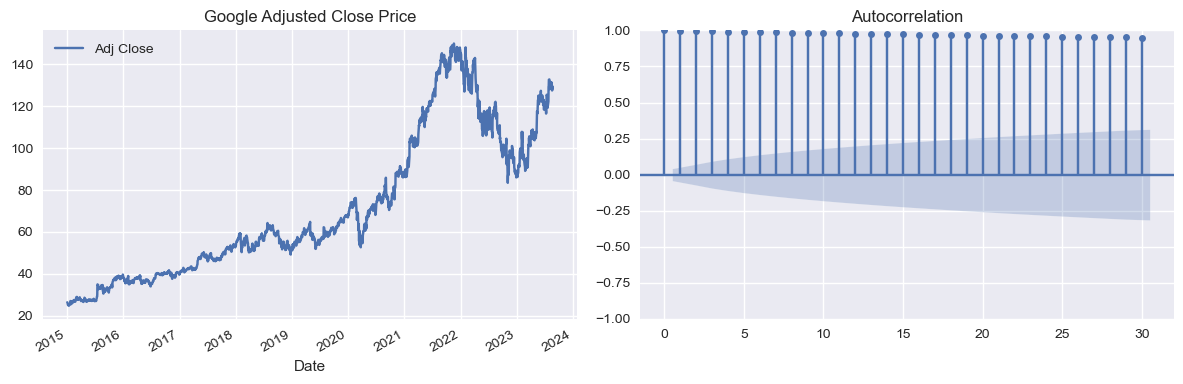

In [8]:
def acf(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ts_ax)
    ts_ax.set_title('Google Adjusted Close Price')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
acf(df_adj, lags=30)

## Differencing

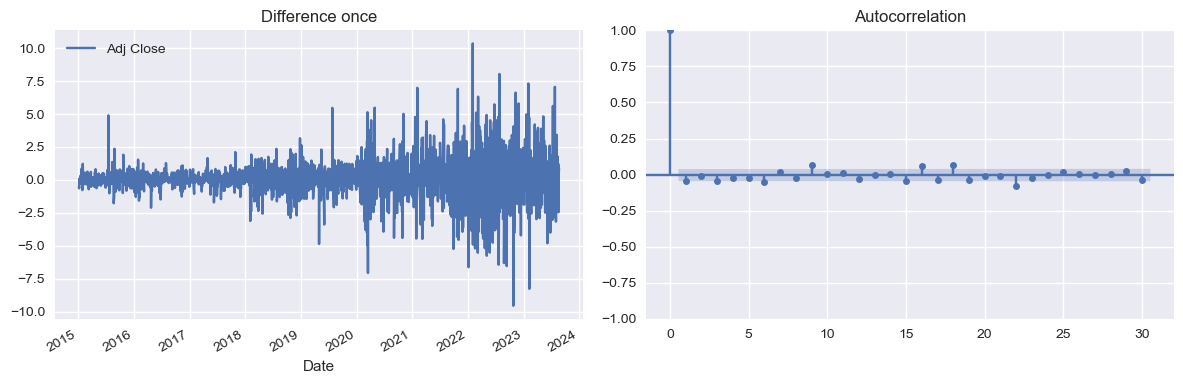

In [9]:
# First Difference
diff1 = df_adj.diff().dropna()
# Plot first order of differencing and ACF plot

def diff1_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
diff1_plot(diff1, lags=30)

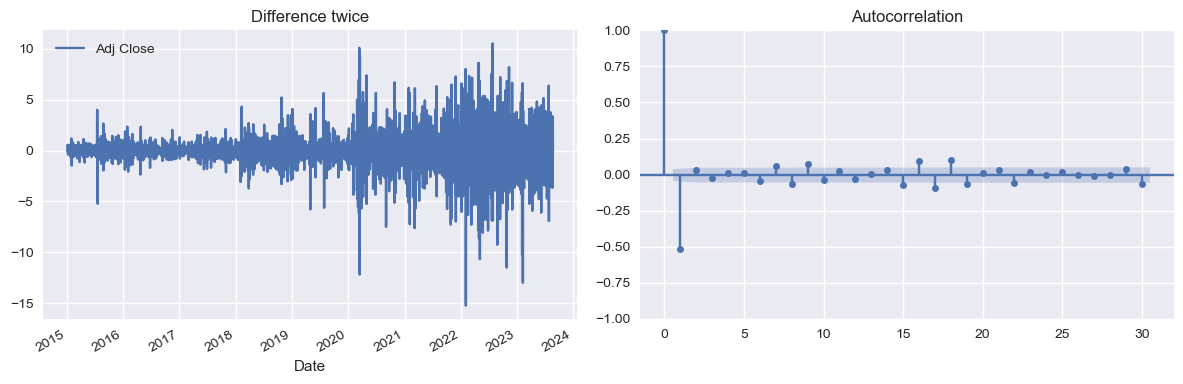

In [10]:
# Difference 2
diff2 = df_adj.diff().diff().dropna()


def diff2_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference twice')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
diff2_plot(diff2, lags=30)

## Auto Regressive Term

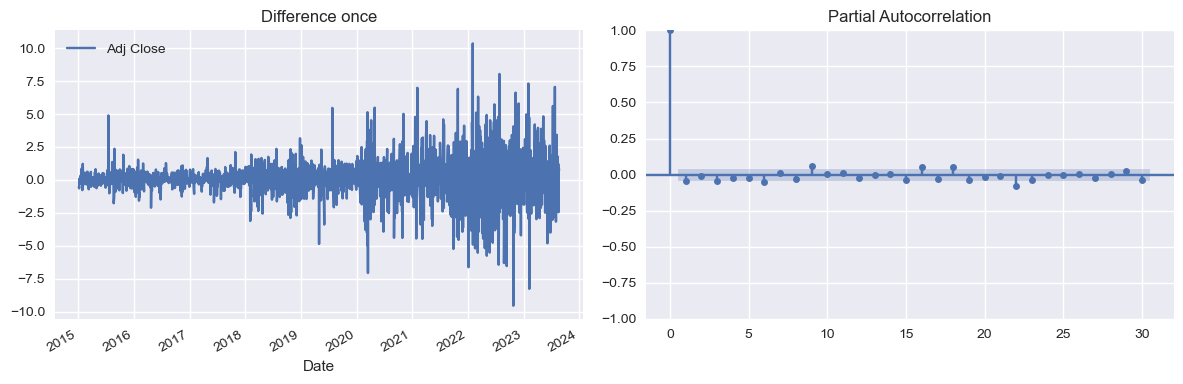

In [11]:
def pacf_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    pacf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
        
pacf_plot(diff1, lags=30)

## Moving Average and Q values

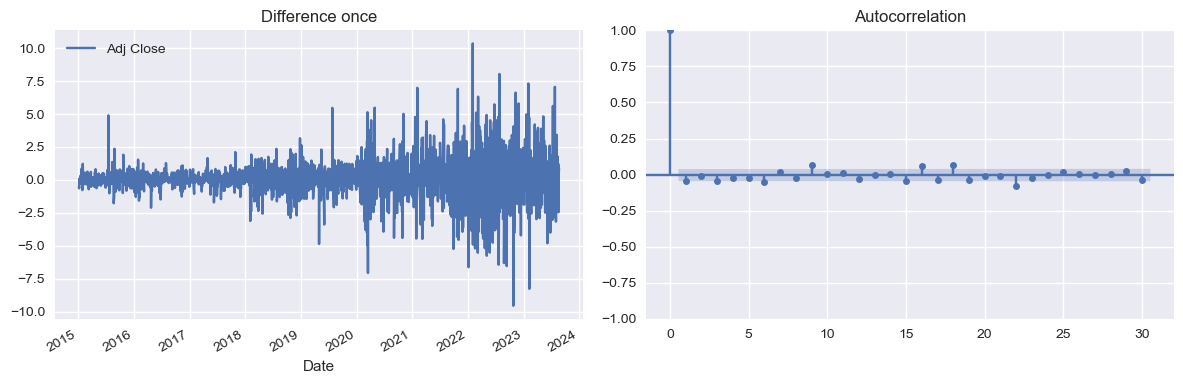

In [12]:
def diff1_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
diff1_plot(diff1, lags=30)

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_adj, order=(3, 1, 3))
result = model.fit()

print(result.summary())


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2174
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3942.354
Date:                Wed, 23 Aug 2023   AIC                           7898.709
Time:                        22:27:35   BIC                           7938.496
Sample:                             0   HQIC                          7913.256
                               - 2174                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7685      0.041     18.954      0.000       0.689       0.848
ar.L2          0.8900      0.018     50.835      0.000       0.856       0.924
ar.L3         -0.8714      0.037    -23.523      0.0

In [14]:
# def optimise_ARIMA(order_list, exog):
#     results = []

#     for order in tqdm(order_list):
#         try:
#             model = SARIMAX(exog, order=order).fit(disp=0)
#         except:
#             continue
#         aic = model.aic
#         results.append([order, model.aic])

#     result_df = pd.DataFrame(results)
#     result_df.columns = ['(p, d, q)', 'AIC']
#     #Sort in ascending order, lower AIC is better
#     result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

#     return result_df

# # Parameters to iterate through
# ps = range(0, 8, 1)
# d = 1
# qs = range(0, 8, 1)

# # Create a list with all possible combination of parameters
# parameters = product(ps, qs)
# parameters_list = list(parameters)

# order_list = []

# for each in parameters_list:
#     each = list(each)
#     each.insert(1, 1)
#     each = tuple(each)
#     order_list.append(each)

In [15]:
best_model = ARIMA(df_adj, order=(4, 1, 4)).fit()
print(best_model.summary())
     

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2174
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -3934.298
Date:                Wed, 23 Aug 2023   AIC                           7886.596
Time:                        22:27:36   BIC                           7937.751
Sample:                             0   HQIC                          7905.300
                               - 2174                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1017      0.024      4.251      0.000       0.055       0.149
ar.L2          1.2944      0.021     60.943      0.000       1.253       1.336
ar.L3          0.1457      0.023      6.375      0.0